In [1]:
import pandas as pd 
import numpy as np
import requests
import json 
import matplotlib.pyplot as plt
import pandas_datareader as web

In [3]:
tickers = ("FB","AMZN","AAPL","MSFT","GOOG","^GSPC")
startDate = "2018-01-01"
endDate = "2018-12-31"

def get_yahoo_data(ticker,startDate,endDate):
    data = web.get_data_yahoo(ticker,start = startDate,end = endDate)
    print("Name: {}\nNo. of values:{}\n\n{}\n".format(ticker,len(data),data.head()))
    return data

In [4]:
facebook = get_yahoo_data(tickers[0],startDate,endDate)
amazon = get_yahoo_data(tickers[1],startDate,endDate)
apple = get_yahoo_data(tickers[2],startDate,endDate)
microsoft = get_yahoo_data(tickers[3],startDate,endDate)
google = get_yahoo_data(tickers[4],startDate,endDate)
snp500 = get_yahoo_data(tickers[5],startDate,endDate)

Name: FB
No. of values:251

                  High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-02  181.580002  177.550003  177.679993  181.419998  18151900   
2018-01-03  184.779999  181.330002  181.880005  184.669998  16886600   
2018-01-04  186.210007  184.100006  184.899994  184.330002  13880900   
2018-01-05  186.899994  184.929993  185.589996  186.850006  13574500   
2018-01-08  188.899994  186.330002  187.199997  188.279999  17994700   

             Adj Close  
Date                    
2018-01-02  181.419998  
2018-01-03  184.669998  
2018-01-04  184.330002  
2018-01-05  186.850006  
2018-01-08  188.279999  

Name: AMZN
No. of values:251

                   High          Low         Open        Close   Volume  \
Date                                                                      
2018-01-02  1190.000000  1170.510010  1172.000000  1189.010010  2694500   
2018-01-03  1205.489990  1188.300049

In [5]:
def add_perchange(df):
    df["pctChange"] = df.iloc[:,5].pct_change()
    return df

def perChange_plot(df):
    plt.bar(df.index,df.iloc[:,6])
    plt.xlabel("Year-Month")
    plt.ylabel("Percent change")

In [6]:
facebook = add_perchange(facebook)
amazon = add_perchange(amazon)
apple = add_perchange(apple)
microsoft = add_perchange(microsoft)
google = add_perchange(google)
snp500 = add_perchange(snp500)
facebook.head() #Column for percentage change has been added for all

,High,Low,Open,Close,Volume,Adj Close,pctChange
Date,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,0.017914
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,-0.001841
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,0.013671
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,0.007653


D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


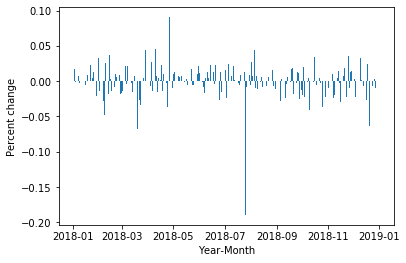

In [7]:
perChange_plot(facebook)

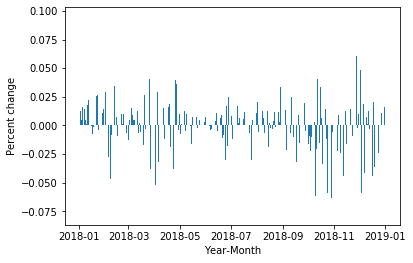

In [8]:
perChange_plot(amazon)

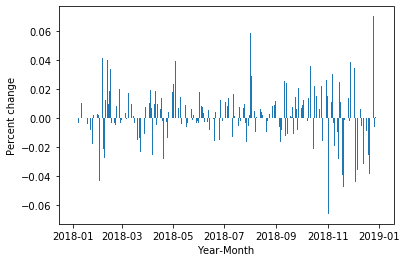

In [9]:
perChange_plot(apple)

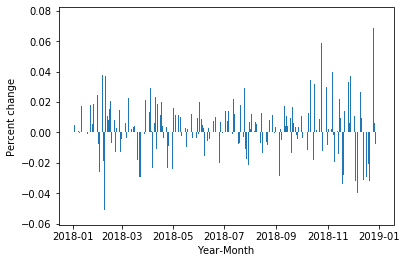

In [10]:
perChange_plot(microsoft)

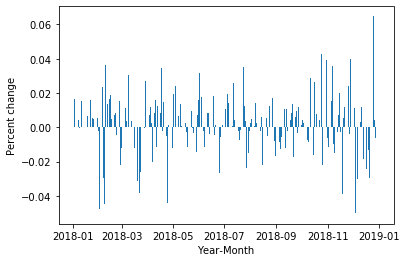

In [11]:
perChange_plot(google)

In [12]:
def print_info(df):
    data = df.iloc[:,6]
    print("Mean: {}\nSD: {}\nVariance: {}\nMax: {}\nMin: {}\n".format(data.mean(),
                                                                 data.std(),
                                                                 data.var(),
                                                                 data.max(),
                                                                 data.min()))


In [13]:
print_info(facebook)
print_info(amazon)
print_info(apple)
print_info(microsoft)
print_info(google)
print_info(snp500)

Mean: -0.0010025208015867083
SD: 0.023948563847251223
Variance: 0.0005735337103458683
Max: 0.09061306906806821
Min: -0.1896092206582256

Mean: 0.0011937267617928079
SD: 0.02276823038454494
Variance: 0.0005183923148437154
Max: 0.09445226581602428
Min: -0.07819679487096065

Mean: -0.0001291092118931334
SD: 0.018106281757256534
Variance: 0.0003278374390731608
Max: 0.07042153386670402
Min: -0.06633078625419342

Mean: 0.0008951229647759713
SD: 0.01783864960510889
Variance: 0.00031821741973385166
Max: 0.07570547001270245
Min: -0.054338121506550596

Mean: 4.5236963362147e-05
SD: 0.01772364137592482
Variance: 0.0003141274636223943
Max: 0.06478047175046653
Min: -0.050578650096208544

Mean: -0.0002328970421437324
SD: 0.010749469402513508
Variance: 0.00011555109243557412
Max: 0.04959374278953943
Min: -0.04097922480422822



In [14]:
def fill_na(df):
    return df.fillna(df.iloc[:,6].mean(), inplace = True)

fill_na(facebook)
fill_na(amazon)
fill_na(apple)
fill_na(microsoft)
fill_na(google)
fill_na(snp500)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

R squared is: 0.33118288146365105
mean squared error is: 5.482433923727342e-05
slope coefficient is: [0.25430476]
intercept is: -9.523337033801882e-05


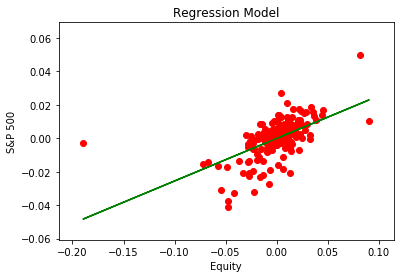

In [24]:
def reg(f,y):
    f_train, f_test, y_train, y_test = train_test_split(f,y, random_state=0)
    
    linreg = LinearRegression()
    linreg.fit(f_train, y_train)
    y_pred = linreg.predict(f_test)
    
    print("R squared is: "+str(linreg.score(f_train, y_train)))
    print("mean squared error is: "+str(metrics.mean_squared_error(y_test,y_pred)))
    print("slope coefficient is: "+str(linreg.coef_))
    print("intercept is: "+str(linreg.intercept_))
    
    plt.scatter(f_train, y_train, color = "red")
    plt.plot(f_train, linreg.predict(f_train), color = "green")
    plt.title("Regression Model")
    plt.xlabel("Equity")
    plt.ylabel("S&P 500")
    
reg( np.array( facebook.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) #FACEBOOK


R squared is: 0.6307878662843789
mean squared error is: 4.995508859737828e-05
slope coefficient is: [0.38855346]
intercept is: -0.0007054096528095609


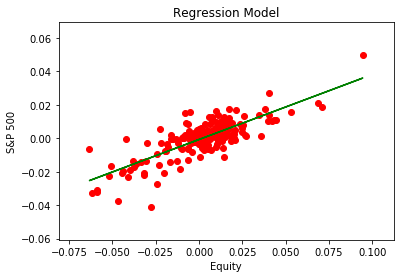

In [17]:
reg( np.array( amazon.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) 

R squared is: 0.6019991490716596
mean squared error is: 5.555847256487603e-05
slope coefficient is: [0.49085737]
intercept is: -0.000341881811262728


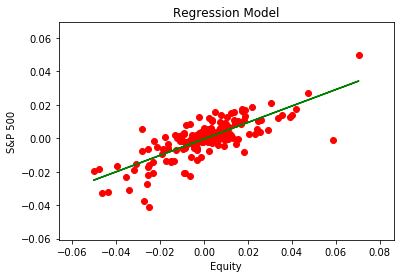

In [18]:
reg( np.array( apple.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) 

R squared is: 0.772986228498945
mean squared error is: 2.2307918579141047e-05
slope coefficient is: [0.52162544]
intercept is: -0.000865817581903342


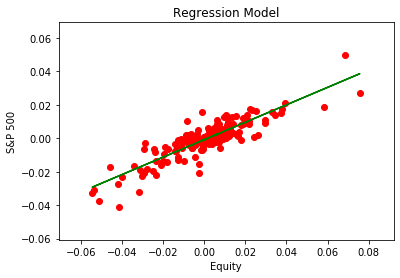

In [19]:
reg( np.array( microsoft.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) 

R squared is: 0.68086235438018
mean squared error is: 2.082671792509325e-05
slope coefficient is: [0.50372039]
intercept is: -0.0005176484247949773


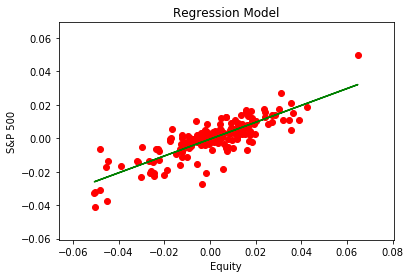

In [20]:
reg( np.array( google.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) 

In [21]:
tickers8 = ["FB", "AMZN", "AAPL", "NFLX", "GOOG", "^GSPC"]
multpl_stocks = web.get_data_yahoo(tickers8,
start = "2018-01-01",
end = "2018-12-31")
multpl_stocks.head()

Attributes   Adj Close                                                    \
Symbols             FB         AMZN        AAPL        NFLX         GOOG   
Date                                                                       
2018-01-02  181.419998  1189.010010  167.199890  201.070007  1065.000000   
2018-01-03  184.669998  1204.199951  167.170776  205.050003  1082.479980   
2018-01-04  184.330002  1209.589966  167.947266  205.630005  1086.400024   
2018-01-05  186.850006  1229.140015  169.859406  209.990005  1102.229980   
2018-01-08  188.279999  1246.869995  169.228500  212.050003  1106.939941   

Attributes                    Close                                       ...  \
Symbols           ^GSPC          FB         AMZN        AAPL        NFLX  ...   
Date                                                                      ...   
2018-01-02  2695.810059  181.419998  1189.010010  172.259995  201.070007  ...   
2018-01-03  2713.060059  184.669998  1204.199951  172.229996  205.050003  ...   
2018-01-04  2723.989990  184.330002  1209.589966  173.029999  205.630005  ...   
2018-01-05  2743.149902  186.850006  1229.140015  175.000000  209.990005  ...   
2018-01-08  2747.709961  188.279999  1246.869995  174.350006  212.050003  ...   

Attributes        Open                                            Volume  \
Symbols           AAPL        NFLX         GOOG        ^GSPC          FB   
Date                                                                       
2018-01-02  170.160004  196.100006  1048.339966  2683.729980  18151900.0   
2018-01-03  172.529999  202.050003  1064.310059  2697.850098  16886600.0   
2018-01-04  172.539993  206.199997  1088.000000  2719.310059  13880900.0   
2018-01-05  173.440002  207.250000  1094.000000  2731.330078  13574500.0   
2018-01-08  174.350006  210.020004  1102.229980  2742.669922  17994700.0   

Attributes                                                              
Symbols          AMZN        AAPL        NFLX       GOOG         ^GSPC  
Date                                                                    
2018-01-02  2694500.0  25555900.0  10966900.0  1237600.0  3.367250e+09  
2018-01-03  3108800.0  29517900.0   8591400.0  1430200.0  3.538660e+09  
2018-01-04  3022100.0  22434600.0   6029600.0  1004600.0  3.695260e+09  
2018-01-05  3544700.0  23660000.0   7033200.0  1279100.0  3.236620e+09  
2018-01-08  4279500.0  20567800.0   5580200.0  1047600.0  3.242650e+09  

[5 rows x 36 columns]

In [22]:
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_daily_returns.head()

Symbols,FB,AMZN,AAPL,NFLX,GOOG,^GSPC
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.017914,0.012775,-0.000174,0.019794,0.016413,0.006399
2018-01-04,-0.001841,0.004476,0.004645,0.002829,0.003621,0.004029
2018-01-05,0.013671,0.016163,0.011385,0.021203,0.014571,0.007034
2018-01-08,0.007653,0.014425,-0.003714,0.009810,0.004273,0.001662


In [23]:
multpl_stock_daily_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG,^GSPC
Symbols,,,,,,
FB,1.000000,0.578176,0.444105,0.482774,0.622293,0.569408
AMZN,0.578176,1.000000,0.660381,0.730339,0.750268,0.766155
AAPL,0.444105,0.660381,1.000000,0.547638,0.680853,0.744693
NFLX,0.482774,0.730339,0.547638,1.000000,0.647231,0.681404
GOOG,0.622293,0.750268,0.680853,0.647231,1.000000,0.830517
^GSPC,0.569408,0.766155,0.744693,0.681404,0.830517,1.000000


In [ ]:
#GOOGLE is the most correlated with the S&P500 and FACEBOOK is the least correlated with S&P500